In [1]:
import pandas as pd

data = pd.read_csv('covid_data2.csv',index_col='date',parse_dates=True)
# data2= data[data['location']== 'New Zealand']

In [2]:
data['total_deaths_per_hundred']= data['total_deaths_per_million']*10000

In [3]:
data.head(60)# data=data.sort_values('date')

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,total_deaths_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,AFG,Asia,Afghanistan,40.0,6.0,1.0,1.0,0.998,0.000006,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-24,AFG,Asia,Afghanistan,42.0,2.0,1.0,0.0,1.047,0.000002,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-25,AFG,Asia,Afghanistan,74.0,32.0,1.0,0.0,1.845,0.000032,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-26,AFG,Asia,Afghanistan,80.0,6.0,2.0,1.0,1.995,0.000006,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-27,AFG,Asia,Afghanistan,91.0,11.0,2.0,0.0,2.269,0.000011,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-28,AFG,Asia,Afghanistan,106.0,15.0,2.0,0.0,2.643,0.000015,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-29,AFG,Asia,Afghanistan,114.0,8.0,4.0,2.0,2.843,0.000008,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04
2020-03-30,AFG,Asia,Afghanistan,114.0,0.0,4.0,0.0,2.843,0.000000,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04
2020-03-31,AFG,Asia,Afghanistan,166.0,52.0,4.0,0.0,4.140,0.000052,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04


In [4]:
 df=data[['iso_code','location','total_deaths_per_hundred']]

In [5]:
# df['country']= (df['location'],inplace=True)



df.rename(columns={ 'location' :'country'}, inplace=True)

C:\Users\Yuga 14\AppData\Local\Temp\ipykernel_20076\3292964113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={ 'location' :'country'}, inplace=True)


In [6]:
df

,iso_code,country,total_deaths_per_hundred
date,,,
2020-03-23,AFG,Afghanistan,0.01
2020-03-24,AFG,Afghanistan,0.01
2020-03-25,AFG,Afghanistan,0.01
2020-03-26,AFG,Afghanistan,0.02
2020-03-27,AFG,Afghanistan,0.02
...,...,...,...
2022-10-23,ZWE,Zimbabwe,56.06
2022-10-24,ZWE,Zimbabwe,56.06
2022-10-25,ZWE,Zimbabwe,56.06


In [7]:
#Create new columns based on distinct values and count them
df = df.sort_values('country')
df['cid'] = (df.groupby(['country']).cumcount()==0).astype(int)
 
df['cid'] = df['cid'].cumsum()

In [8]:
udf=df.loc[df['cid'] == 204]
sudf = udf.sort_values('total_deaths_per_hundred')
sudf

,iso_code,country,total_deaths_per_hundred,cid
date,,,,
2020-01-31,GBR,United Kingdom,0.01,204
2020-02-01,GBR,United Kingdom,0.01,204
2020-02-04,GBR,United Kingdom,0.02,204
2020-02-06,GBR,United Kingdom,0.02,204
2020-02-02,GBR,United Kingdom,0.02,204
...,...,...,...,...
2022-10-11,GBR,United Kingdom,2084.97,204
2022-10-10,GBR,United Kingdom,2084.97,204
2022-10-09,GBR,United Kingdom,2084.97,204


In [9]:
val = sudf['total_deaths_per_hundred'].values

In [10]:
val

array([1.00000e-02, 1.00000e-02, 2.00000e-02, 2.00000e-02, 2.00000e-02,
       2.00000e-02, 2.00000e-02, 2.00000e-02, 2.00000e-02, 2.00000e-02,
       2.00000e-02, 2.00000e-02, 2.00000e-02, 2.00000e-02, 2.00000e-02,
       2.00000e-02, 2.00000e-02, 2.00000e-02, 2.00000e-02, 2.00000e-02,
       2.00000e-02, 2.00000e-02, 3.00000e-02, 3.00000e-02, 3.00000e-02,
       3.00000e-02, 3.00000e-02, 3.00000e-02, 3.00000e-02, 3.00000e-02,
       3.00000e-02, 4.00000e-02, 4.00000e-02, 5.00000e-02, 7.00000e-02,
       9.00000e-02, 9.00000e-02, 1.10000e-01, 1.60000e-01, 1.90000e-01,
       2.60000e-01, 3.90000e-01, 5.50000e-01, 7.60000e-01, 1.07000e+00,
       1.58000e+00, 2.16000e+00, 2.89000e+00, 3.68000e+00, 4.86000e+00,
       6.30000e+00, 8.13000e+00, 1.02100e+01, 1.28400e+01, 1.62100e+01,
       2.03400e+01, 2.49700e+01, 3.01300e+01, 3.59900e+01, 4.31000e+01,
       5.14100e+01, 6.06500e+01, 7.07200e+01, 8.13300e+01, 9.28000e+01,
       1.05000e+02, 1.16700e+02, 1.29630e+02, 1.44240e+02, 1.579

In [11]:
train, test = val[:-60],  val[-60:]

In [12]:
test

array([2066.5 , 2066.9 , 2067.61, 2068.03, 2068.49, 2069.01, 2069.43,
       2069.82, 2070.19, 2070.77, 2071.22, 2071.59, 2072.01, 2072.3 ,
       2072.71, 2073.18, 2073.59, 2074.03, 2074.4 , 2074.8 , 2075.17,
       2075.63, 2076.08, 2076.44, 2076.92, 2077.41, 2077.85, 2078.22,
       2078.82, 2079.43, 2079.97, 2080.56, 2081.1 , 2081.74, 2082.26,
       2082.9 , 2083.58, 2084.18, 2084.62, 2084.97, 2084.97, 2084.97,
       2084.97, 2084.97, 2084.97, 2084.97, 2084.97, 2084.97, 2084.97,
       2084.97, 2084.97, 2084.97, 2084.97, 2084.97, 2084.97, 2084.97,
       2084.97, 2084.97, 2084.97, 2092.08])

In [13]:
test.shape

(60,)

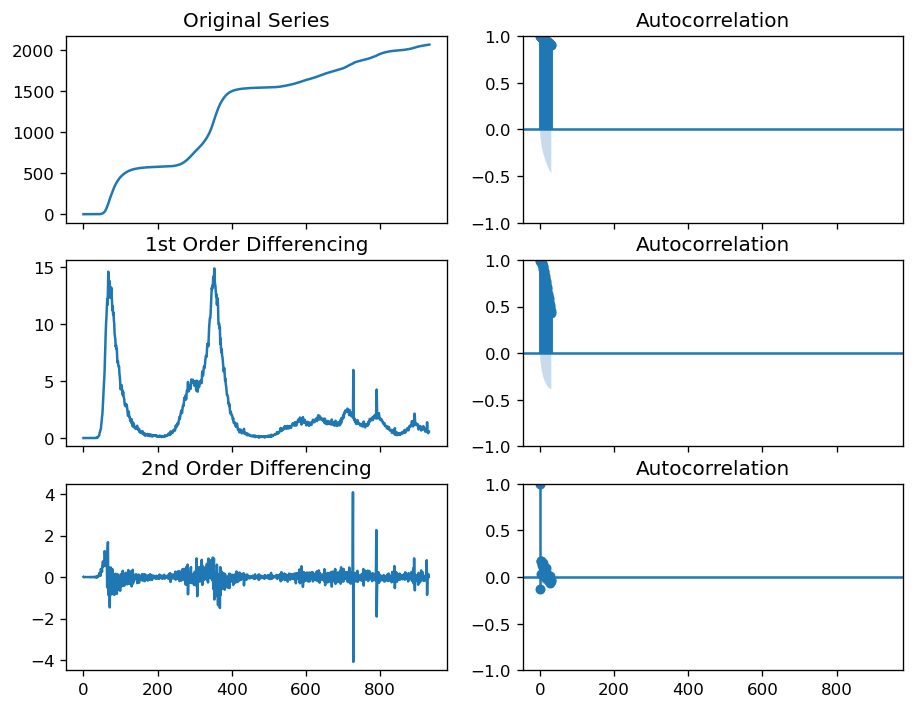

In [14]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train); axes[0, 0].set_title('Original Series')
plot_acf(train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(train)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(train), ax=axes[1, 1])
difftrain = np.diff(train)

# 2nd Differencing
axes[2, 0].plot(np.diff(difftrain)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(difftrain), ax=axes[2, 1])
plt.show()

In [15]:
# !pip install pmdarima

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=655.040, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4710.870, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3582.734, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5111.418, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=655.537, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=651.517, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2798.066, Time=0.50 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=659.030, Time=0.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=613.710, Time=1.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2314.064, Time=0.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=429.500, Time=1.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=656.791, Time=2.11 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=433.858,

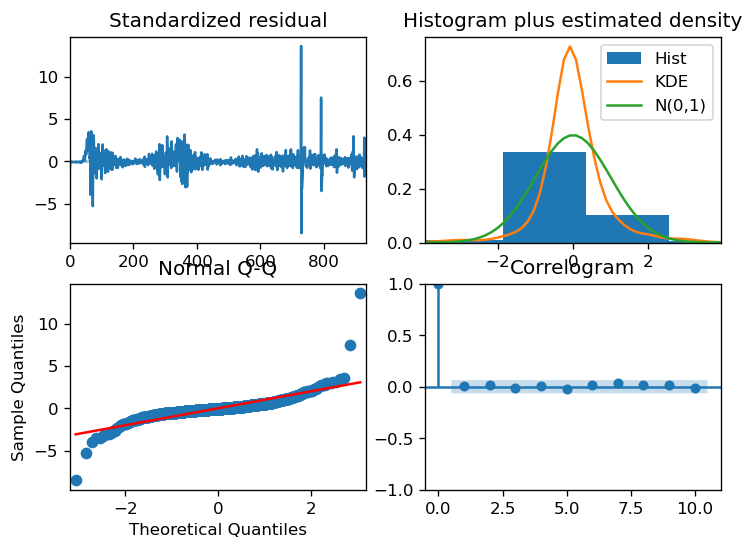

In [17]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

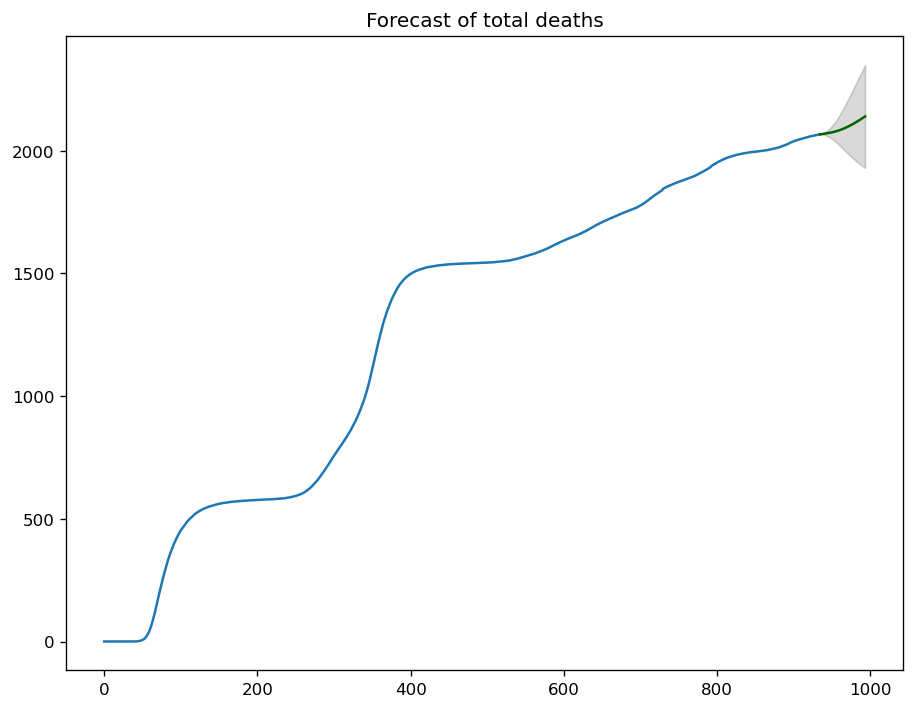

In [18]:
# Forecast
n_periods = 60
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of total deaths")
plt.show()

In [19]:
print(fc_series)

934    2066.503736
935    2067.024354
936    2067.523599
937    2068.007617
938    2068.482173
939    2068.952655
940    2069.424089
941    2069.901149
942    2070.388165
943    2070.889141
944    2071.407760
945    2071.947396
946    2072.511130
947    2073.101759
948    2073.721808
949    2074.373539
950    2075.058967
951    2075.779871
952    2076.537802
953    2077.334096
954    2078.169886
955    2079.046114
956    2079.963538
957    2080.922743
958    2081.924156
959    2082.968052
960    2084.054562
961    2085.183687
962    2086.355305
963    2087.569180
964    2088.824969
965    2090.122234
966    2091.460447
967    2092.839000
968    2094.257208
969    2095.714322
970    2097.209532
971    2098.741974
972    2100.310739
973    2101.914874
974    2103.553391
975    2105.225273
976    2106.929476
977    2108.664935
978    2110.430572
979    2112.225293
980    2114.047999
981    2115.897587
982    2117.772952
983    2119.672990
984    2121.596607
985    2123.542714
986    2125.

In [20]:
accuracy=pd.DataFrame({'observed':test, 'predicted':fc_series})

In [21]:
accuracy['diff']= accuracy['predicted']-accuracy['observed'] 

In [22]:
accuracy['country']='United Kingdom' 

In [23]:
accuracy

,observed,predicted,diff,country
934,2066.50,2066.503736,0.003736,United Kingdom
935,2066.90,2067.024354,0.124354,United Kingdom
936,2067.61,2067.523599,-0.086401,United Kingdom
937,2068.03,2068.007617,-0.022383,United Kingdom
938,2068.49,2068.482173,-0.007827,United Kingdom
939,2069.01,2068.952655,-0.057345,United Kingdom
940,2069.43,2069.424089,-0.005911,United Kingdom
941,2069.82,2069.901149,0.081149,United Kingdom
942,2070.19,2070.388165,0.198165,United Kingdom
943,2070.77,2070.889141,0.119141,United Kingdom


In [24]:
edf=df.loc[df['cid'] == 183]
sedf = edf.sort_values('total_deaths_per_hundred')
sedf

,iso_code,country,total_deaths_per_hundred,cid
date,,,,
2020-03-03,ESP,Spain,0.01,183
2020-03-04,ESP,Spain,0.02,183
2020-03-05,ESP,Spain,0.03,183
2020-03-06,ESP,Spain,0.05,183
2020-03-07,ESP,Spain,0.10,183
...,...,...,...,...
2022-10-19,ESP,Spain,1146.41,183
2022-10-20,ESP,Spain,1146.41,183
2022-10-16,ESP,Spain,1146.41,183


In [25]:
val1 = sedf['total_deaths_per_hundred'].values

In [26]:
train1, test1 = val1[:-60],  val1[-60:]

In [27]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model1 = pm.auto_arima(train1, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3677.687, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14339.620, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3567.842, Time=0.54 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3467.268, Time=0.69 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=1.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.26 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3468.564, Time=1.13 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 7.975 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No.

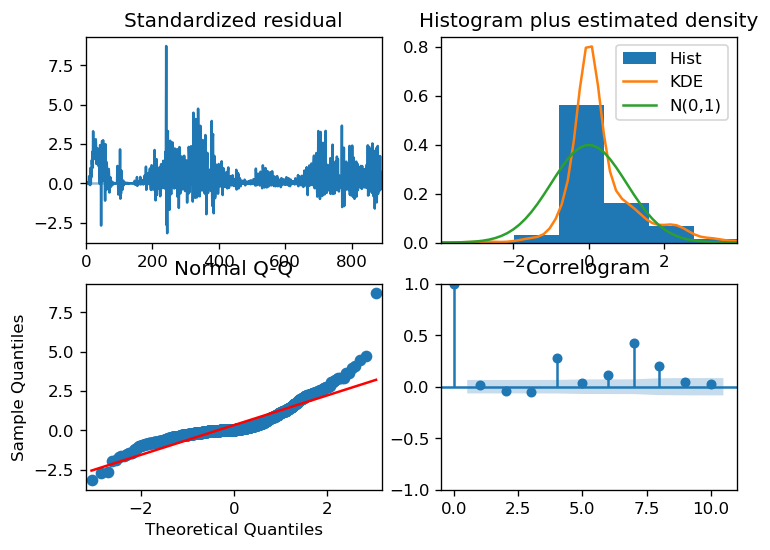

In [28]:
model1.plot_diagnostics(figsize=(7,5))
plt.show()

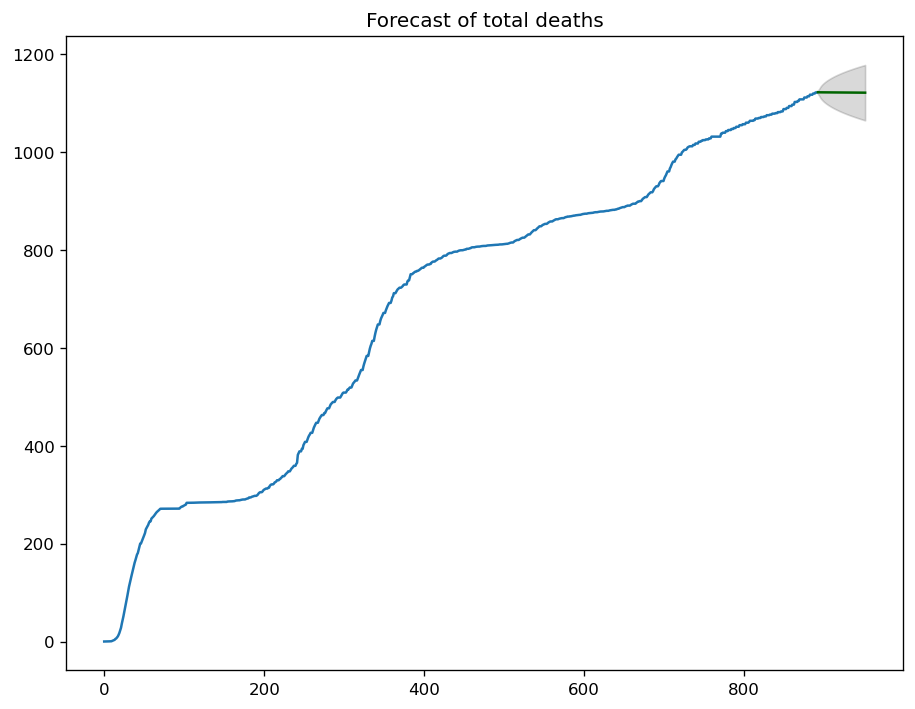

In [29]:
# Forecast
n_periods = 60
fc, confint = model1.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train1), len(train1)+n_periods)

# make series for plotting purpose
fc_series1 = pd.Series(fc, index=index_of_fc)
lower_series1 = pd.Series(confint[:, 0], index=index_of_fc)
upper_series1 = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train1)
plt.plot(fc_series1, color='darkgreen')
plt.fill_between(lower_series1.index,
lower_series1,
upper_series1,
color='k', alpha=.15)
plt.title("Forecast of total deaths")
plt.show()

In [30]:
print(fc_series1)

892    1121.771758
893    1121.673188
894    1121.544514
895    1121.531704
896    1121.518894
897    1121.506084
898    1121.493274
899    1121.480465
900    1121.467656
901    1121.454846
902    1121.442037
903    1121.429229
904    1121.416420
905    1121.403611
906    1121.390803
907    1121.377994
908    1121.365186
909    1121.352378
910    1121.339570
911    1121.326763
912    1121.313955
913    1121.301148
914    1121.288340
915    1121.275533
916    1121.262726
917    1121.249919
918    1121.237112
919    1121.224306
920    1121.211499
921    1121.198693
922    1121.185887
923    1121.173081
924    1121.160275
925    1121.147470
926    1121.134664
927    1121.121859
928    1121.109053
929    1121.096248
930    1121.083443
931    1121.070639
932    1121.057834
933    1121.045029
934    1121.032225
935    1121.019421
936    1121.006617
937    1120.993813
938    1120.981009
939    1120.968205
940    1120.955402
941    1120.942598
942    1120.929795
943    1120.916992
944    1120.

In [31]:
accuracy2=pd.DataFrame({'observed':test1, 'predicted':fc_series1})

In [32]:
accuracy2['diff']= accuracy2['predicted']-accuracy2['observed'] 

In [36]:
accuracy2['country']='Spain'

In [37]:
accuracy2

,observed,predicted,diff,country
892,1121.28,1121.771758,0.491758,Spain
893,1122.46,1121.673188,-0.786812,Spain
894,1122.46,1121.544514,-0.915486,Spain
895,1122.46,1121.531704,-0.928296,Spain
896,1124.54,1121.518894,-3.021106,Spain
897,1124.54,1121.506084,-3.033916,Spain
898,1124.54,1121.493274,-3.046726,Spain
899,1124.54,1121.480465,-3.059535,Spain
900,1126.00,1121.467656,-4.532344,Spain
901,1126.00,1121.454846,-4.545154,Spain


In [38]:
uk_sp= pd.concat([accuracy2,accuracy],ignore_index=True)

In [39]:
uk_sp

,observed,predicted,diff,country
0,1121.28,1121.771758,0.491758,Spain
1,1122.46,1121.673188,-0.786812,Spain
2,1122.46,1121.544514,-0.915486,Spain
3,1122.46,1121.531704,-0.928296,Spain
4,1124.54,1121.518894,-3.021106,Spain
...,...,...,...,...
115,2084.97,2131.530707,46.560707,United Kingdom
116,2084.97,2133.573400,48.603400,United Kingdom
117,2084.97,2135.632358,50.662358,United Kingdom
118,2084.97,2137.706611,52.736611,United Kingdom


In [40]:
uk_sp.to_csv("C:/Users/Yuga 14/Desktop/final project/crona/covid_uk_sp.csv", index=False)